In [20]:
from collections import defaultdict
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/Colab Notebooks/creditcard.csv"

try:
    df = pd.read_csv(file_path)
    print("Data loaded successfully!")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")


df.shape
df.info()
df.describe()
df.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17    

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


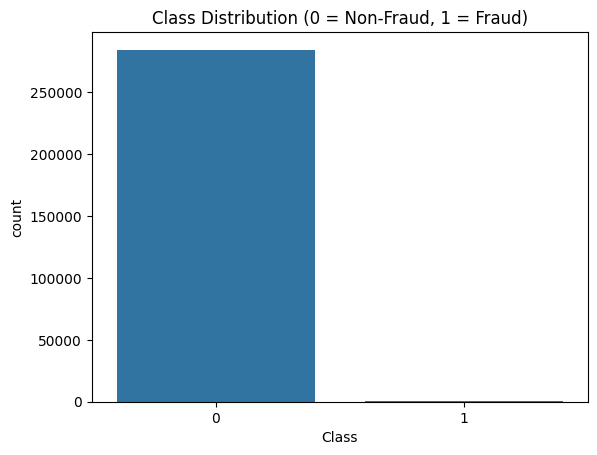

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.show()

In [ ]:
#for fraud percentage
fraud_percentage = (df['Class'].sum() / len(df)) * 100
print(f"Fraud Percentage: {fraud_percentage:.4f}%")

Fraud Percentage: 0.1727%


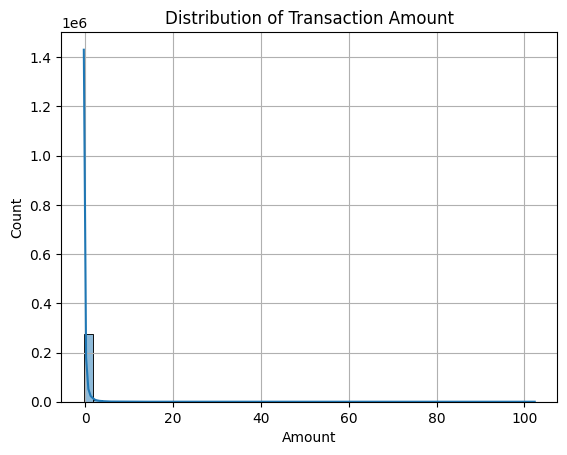

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amount")
plt.grid(True)
plt.show()


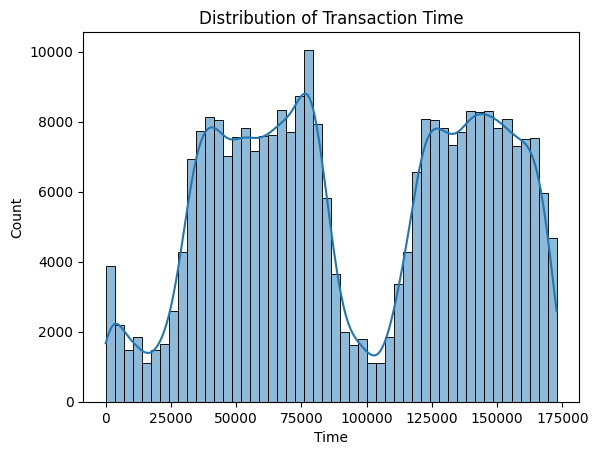

In [ ]:
sns.histplot(df['Time'], bins=50, kde=True)
plt.title("Distribution of Transaction Time")
plt.show()

#we need to convert second into hour
df['Hour'] = df['Time'] // 3600 % 24


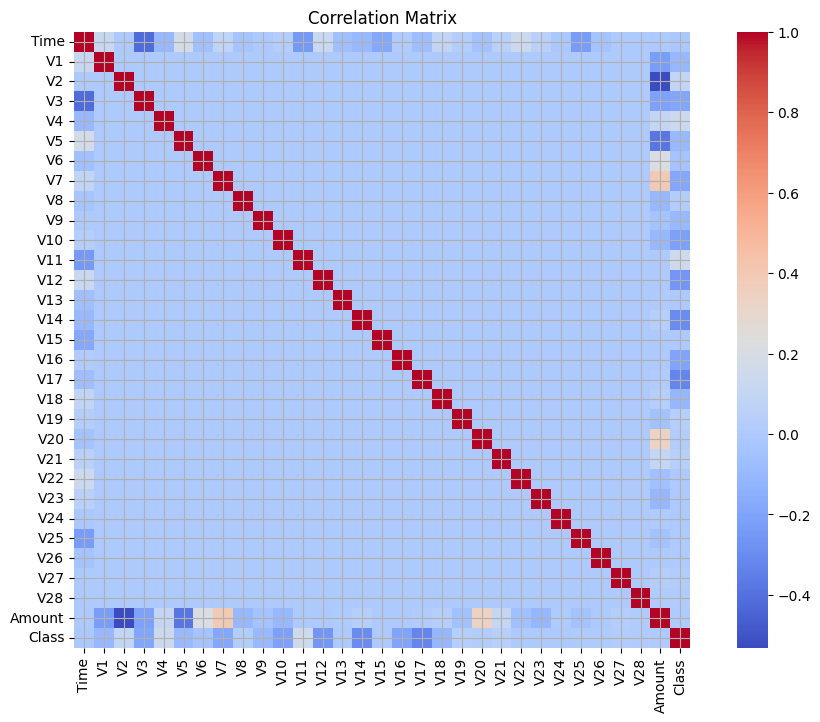

In [ ]:
#V features correlating
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation, cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.grid(True)
plt.show()


In [17]:
#Feature Scaling (Standardize Amount and Time)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])


In [16]:
# Handle Class Imbalance (SMOTE)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


In [10]:
#Training ML Model (Random Forest as example)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_bal, y_train_bal)


RandomForestClassifier(random_state=42)

In [25]:
#Evaluating the Model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))


[[56861     3]
 [    5    93]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.95      0.96        98

    accuracy                           1.00     56962
   macro avg       0.98      0.97      0.98     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9744634171901737


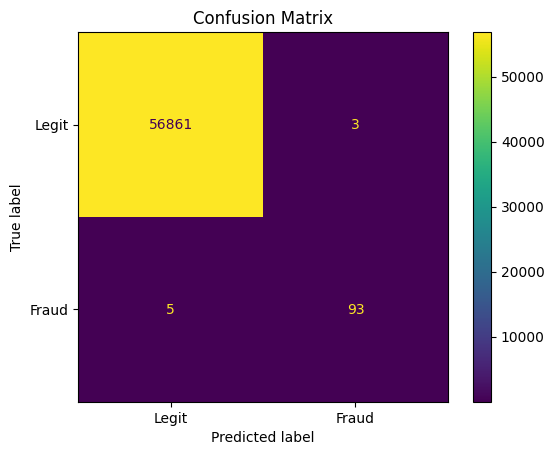

In [27]:
#ploting confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=["Legit", "Fraud"])
plt.title("Confusion Matrix")
plt.show()
